# COMP90051 Project 2
**Name:** *enter your name here*

**Student ID:** *your id here*

# Note!!! This code is only for your reference! Copying any code to your homework is prohibited!!!

In [1]:
# You can add additional imports here
import numpy as np
from matplotlib import pyplot as plt
import os
import random
from sklearn.model_selection import train_test_split
from collections import defaultdict

In [2]:
import warnings

In [3]:
warnings.filterwarnings("ignore")

## 0. Loading the dataset

In [4]:
# do not edit this cell
# load the data files (download from the LMS)
embedded_images = np.load('images.npy')
labels = np.load('labels.npy')

In [5]:
embedded_images[0].shape

(1000,)

In [6]:
from sklearn.preprocessing import StandardScaler
## z score
scaler = StandardScaler()
embedded_images = scaler.fit_transform(embedded_images)

In [7]:
# split into pool & testing
X_pool, X_test, y_pool, y_test = train_test_split(embedded_images, labels, 
                                                  test_size=0.5, random_state=1234, shuffle=True)

In [8]:
# sample a seed set
np.random.seed(1234)
label2id = defaultdict(list)
for i, label in enumerate(y_pool):
    label2id[label].append(i)

In [9]:
y_test[0]

'Syriac_(Estrangelo)'

In [10]:
label2id[y_test[0]]

[34,
 173,
 227,
 244,
 293,
 464,
 493,
 562,
 574,
 596,
 614,
 633,
 649,
 710,
 758,
 763,
 780,
 788,
 821,
 827,
 852,
 910,
 919,
 1004,
 1031,
 1228,
 1251,
 1277,
 1381,
 1399,
 1438,
 1440,
 1456,
 1468,
 1469,
 1509,
 1535,
 1553,
 1557,
 1598,
 1625,
 1705,
 1760,
 1819,
 1944,
 2091,
 2238,
 2279,
 2309,
 2318,
 2335,
 2336,
 2352,
 2396,
 2412,
 2431,
 2495,
 2624,
 2735,
 2755,
 2857,
 2887,
 2891,
 2920,
 2960,
 3029,
 3043,
 3228,
 3239,
 3324,
 3345,
 3362,
 3395,
 3400,
 3401,
 3413,
 3482,
 3545,
 3564,
 3576,
 3662,
 3668,
 3778,
 3807,
 3858,
 3892,
 3894,
 3915,
 3944,
 3978,
 3981,
 4051,
 4102,
 4121,
 4173,
 4279,
 4290,
 4305,
 4308,
 4331,
 4344,
 4385,
 4386,
 4401,
 4483,
 4564,
 4584,
 4625,
 4676,
 4746,
 4833,
 4845,
 4852,
 4853,
 4856,
 4933,
 4968,
 4974,
 5104,
 5180,
 5234,
 5275,
 5427,
 5442,
 5462,
 5527,
 5656,
 5663,
 5673,
 5809,
 5823,
 5827,
 5866,
 5895,
 5977,
 5992,
 6009,
 6010,
 6106,
 6140,
 6210,
 6213,
 6246,
 6293,
 6321,
 6323,
 6

In [11]:
seed_set = []
for label, ids in label2id.items():
    seed_set.extend(np.random.choice(ids, size=10, replace=False))

## 1. Applying logistic regression

In [12]:
from sklearn.linear_model import LogisticRegression

In [112]:
def train_logistic_regression(X, y, **args):
    """
    Train a logistic regression model on dataset (X, y) and return trained model.
    X: matrix of real values, size n x d
    y: vector of string labels, size n
    args: optional arguments e.g., for hyper-parameters
    """
    # your code here
    model = LogisticRegression(max_iter = args['max_iter'])
    model.fit(X, y)
    return model

In [77]:
? LogisticRegression

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
def evaluate_logistic_regression_accuracy(Xt, yt, model):
    """
    Apply logistic regression prediction on dataset Xt and evaluate accuracy against yt,
    returing the accuracy results as a scalar.
    Xt: matrix of real values, size m x d
    yt: vector of string labels, size m
    """
    # your code here
    return accuracy_score(yt, model.predict(Xt))

In [16]:
# your code here for training, evaluating & plotting results

In [17]:
np.unique(y_test)

array(['Alphabet_of_the_Magi', 'Anglo-Saxon_Futhorc', 'Arcadian',
       'Armenian', 'Asomtavruli_(Georgian)', 'Balinese', 'Bengali',
       'Blackfoot_(Canadian_Aboriginal_Syllabics)', 'Braille',
       'Burmese_(Myanmar)', 'Cyrillic', 'Early_Aramaic', 'Futurama',
       'Grantha', 'Greek', 'Gujarati', 'Hebrew',
       'Inuktitut_(Canadian_Aboriginal_Syllabics)', 'Japanese_(hiragana)',
       'Japanese_(katakana)', 'Korean', 'Latin', 'Malay_(Jawi_-_Arabic)',
       'Mkhedruli_(Georgian)', 'N_Ko',
       'Ojibwe_(Canadian_Aboriginal_Syllabics)', 'Sanskrit',
       'Syriac_(Estrangelo)', 'Tagalog', 'Tifinagh'], dtype='<U41')

In [18]:
model = train_logistic_regression(X_pool, y_pool)

evaluate_logistic_regression_accuracy(X_test, y_test, model)

0.5757261410788381

In [19]:
model = train_logistic_regression(X_pool[seed_set], y_pool[seed_set])

evaluate_logistic_regression_accuracy(X_test, y_test, model)

0.31483402489626555

In [20]:
import seaborn as sns

In [21]:
model.predict_proba(X_pool)[0]

array([1.58212789e-04, 5.55536611e-03, 1.82322743e-04, 7.43880435e-04,
       2.30286930e-05, 1.16103886e-04, 4.55602799e-03, 2.38499220e-05,
       9.02639327e-05, 5.12775008e-03, 3.38552417e-03, 1.67972293e-03,
       1.64736131e-03, 3.79116931e-07, 4.73243969e-01, 1.83111541e-04,
       8.43855530e-04, 1.84875432e-05, 7.07507789e-02, 8.24304500e-05,
       2.25757469e-06, 3.67072799e-03, 7.76462544e-05, 4.06329995e-01,
       2.88665056e-04, 4.30508475e-05, 2.00264285e-06, 7.70245084e-04,
       2.03980643e-02, 4.91835354e-06])

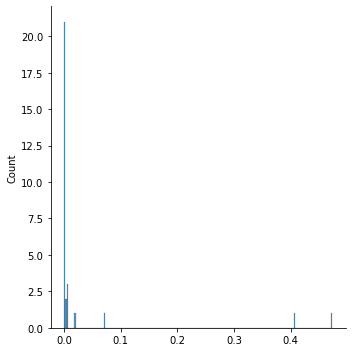

In [22]:
sns.displot(model.predict_proba(X_pool)[0])

In [23]:
model.predict_proba(X_pool)[1]

array([1.03124239e-09, 9.34952804e-01, 2.63494338e-08, 3.37808816e-04,
       1.31768393e-03, 5.40141448e-08, 1.15581213e-08, 4.76709761e-03,
       6.25315401e-07, 7.10954628e-10, 1.59358399e-02, 2.42388730e-05,
       2.27682586e-04, 1.56562264e-05, 2.93238314e-06, 2.96638516e-08,
       4.95640426e-06, 3.56648424e-03, 2.83417897e-10, 7.14748691e-06,
       2.29061877e-05, 1.11162717e-02, 1.56466311e-06, 4.13320242e-07,
       5.86827146e-03, 3.79657353e-04, 1.60233073e-07, 1.11473812e-05,
       7.70347808e-11, 2.14385267e-02])

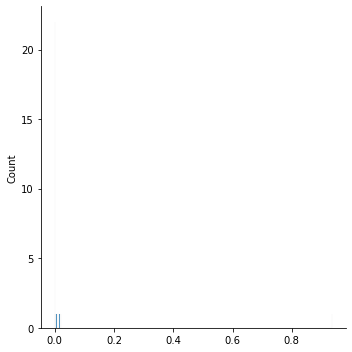

In [24]:
sns.displot(model.predict_proba(X_pool)[1])

## 2. Active learning framework with Random selection

In [25]:
def random_select(X, model, **args):
    """
    Given an unlabelled dataset X, a matrix of n x d, and a model (not used)
    returns a vector of scores of length n. Each entry reflects the priority 
    of the corresponding instance. Higher means better.
    """
    # fill in
    return np.random.randn(len(X))

In [26]:
from tqdm import tqdm

In [27]:
len(seed_set)

300

In [28]:
def pool_based_active_learning(X_pool, y_pool, seed_ids,
                               train_func, select_func,
                               max_size, batch_size, **args):
    """
    Perform an active learning simulation, which starts by training on a seed set,
    then iteratively applies the selection function to rank instances in the pool,
    selects the top few instances which are included into the training set and the
    process repeats. 
        X_pool: matrix of n x d
        y_pool: vector of string labels, size n
        seed_ids: initial labelled set set, as a list of indices [0..n-1] into pool
        train_func: function which given (X, y, optional args) returns a trained model
        select_func: function which given (X, optional args) returns a sequence of scores
        max_size: stopping condition for active learning, when labelled data reaches given size
        batch_size: number of instances to be labelled in each iteration
        args: optional arguments passed to training and selection function
    returns the sequence of trained models 
    """
  
    # fill in
    X_L, y_L = X_pool[seed_ids], y_pool[seed_ids]
    model_list = []
    for t in tqdm(range(len(X_pool) // batch_size)):
        model = train_func(X_L, y_L)
        selected = np.where(select_func(X_pool, model).argsort()[::-1] < batch_size)[0]
        X_L, y_L = np.vstack([X_L, X_pool[selected]]), np.hstack([y_L, y_pool[selected]])
        X_pool = X_pool[[x for x in range(len(X_pool)) if x not in selected]]
        y_pool = y_pool[[x for x in range(len(y_pool)) if x not in selected]]
        model_list.append(model)
        if len(X_L) > max_size:
            break
    return model_list

In [29]:
batch = 60
max_size = 3000
models_random = pool_based_active_learning(X_pool, y_pool, seed_set, 
                                    train_logistic_regression, random_select, 
                                    max_size, batch)

 28%|██▊       | 45/160 [00:53<02:17,  1.20s/it]


In [30]:
## your code here for evaluation of accuracy and plotting of results

In [31]:
results = [evaluate_logistic_regression_accuracy(X_test, y_test, model) for model in models_random]

In [32]:
import seaborn as sns

<AxesSubplot:>

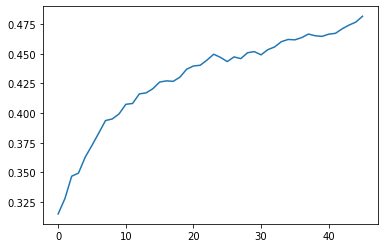

In [33]:
sns.lineplot(range(len(results)),results)

## 3. Uncertainty sampling

In [34]:
def logistic_regression_entropy_select(X, model, **args):
    """
    Given an unlabelled dataset X, a matrix of n x d, and a discriminative model 
    P(y|x), returns a vector of n entropy values.
    """
    # fill in
    pre_prob = model.predict_proba(X)
    
    return np.sum(-1 * pre_prob * np.log2(pre_prob), axis=1)

In [35]:
models_us = pool_based_active_learning(X_pool, y_pool, seed_set, 
                                 train_logistic_regression, 
                                 logistic_regression_entropy_select, 
                                 max_size, batch)

 28%|██▊       | 45/160 [00:51<02:11,  1.14s/it]


In [36]:
## your code here for evaluation of accuracy and plotting of results

In [37]:
results_us = [evaluate_logistic_regression_accuracy(X_test, y_test, model) for model in models_us]

<AxesSubplot:>

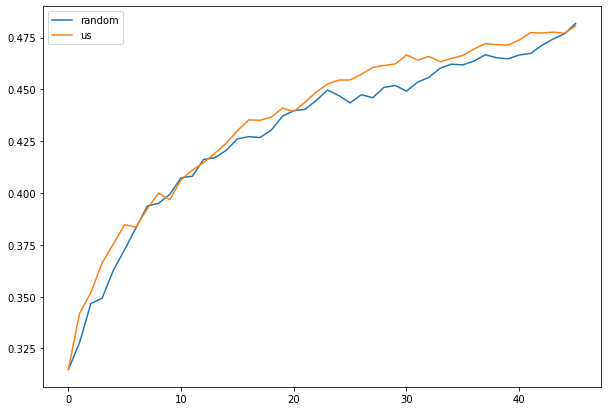

In [38]:
plt.figure(figsize=(10,7))
sns.lineplot(range(len(results)),results, label='random')
sns.lineplot(range(len(results)),results_us,label='us')

## 4. Query by committee

In [68]:
np.array([0.8]).round()

array([1.])

In [93]:
# don't forget to provide function descriptive comments, like those provided in templates above

def query_by_committee_vote_entropy(X, model, **args):
    P_c = (model[0].predict_proba(X).round() + model[1].predict_proba(X).round())
    return np.sum(-1 * (P_c / 2) * np.log2(P_c / 2), axis=1)
    
def query_by_committee_soft_vote_entropy(X, model, **args):
    P_c = (model[0].predict_proba(X) + model[1].predict_proba(X)) / 2
    return np.sum(-1 * P_c * np.log2(P_c), axis=1)

def KL(c, theta, is_theta1):
    return np.sum(-1 * theta * np.log2(theta / c), axis=1)

def query_by_committee_KL(X, model, **args):
    P_c = (model[0].predict_proba(X) + model[1].predict_proba(X)) / 2
    P_theta1 = model[0].predict_proba(X)
    P_theta2 = model[1].predict_proba(X)
    
    result = np.zeros(len(X))
    for i,v in enumerate([P_theta1, P_theta2]):
        result += KL(P_c, v, i)

    return result

In [113]:
def train_committee(X_pool, y_pool, seed_ids, train_func, select_func,max_size, batch_size, **args):
    # fill in
    X_L, y_L = X_pool[seed_ids], y_pool[seed_ids]
    model_list = []
    for t in tqdm(range(len(X_pool) // batch_size)):
        model = []
        model.append(train_func(X_L, y_L,max_iter=300))
        model.append(train_func(X_L, y_L,max_iter=500))
        
        selected = np.where(select_func(X_pool, model).argsort()[::-1] < batch_size)[0]
        X_L, y_L = np.vstack([X_L, X_pool[selected]]), np.hstack([y_L, y_pool[selected]])
        X_pool = X_pool[[x for x in range(len(X_pool)) if x not in selected]]
        y_pool = y_pool[[x for x in range(len(y_pool)) if x not in selected]]
        model_list.append(model)
        if len(X_L) > max_size:
            break
    return model_list

In [114]:
## your code here for training, evaluation, and plotting code

In [115]:
models_cm = train_committee(X_pool, y_pool,seed_set, train_logistic_regression, query_by_committee_KL, max_size, batch)

 28%|██▊       | 45/160 [06:30<16:36,  8.67s/it]


In [116]:
models_soft = train_committee(X_pool, y_pool,seed_set, train_logistic_regression, query_by_committee_soft_vote_entropy, max_size, batch)

 28%|██▊       | 45/160 [05:45<14:41,  7.67s/it]


In [117]:
models_hard = train_committee(X_pool, y_pool,seed_set, train_logistic_regression, query_by_committee_vote_entropy, max_size, batch)

 28%|██▊       | 45/160 [05:47<14:47,  7.71s/it]


In [118]:
results_c = [evaluate_logistic_regression_accuracy(X_test, y_test, model[1]) for model in models_cm]
results_hard = [evaluate_logistic_regression_accuracy(X_test, y_test, model[1]) for model in models_hard]
results_solf = [evaluate_logistic_regression_accuracy(X_test, y_test, model[1]) for model in models_soft]

<AxesSubplot:>

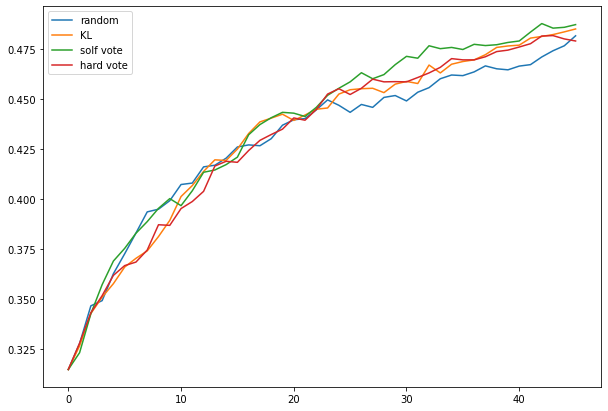

In [119]:
plt.figure(figsize=(10,7))
sns.lineplot(range(len(results)),results, label='random')
sns.lineplot(range(len(results)),results_c,label='KL')
sns.lineplot(range(len(results)),results_solf,label='solf vote')
sns.lineplot(range(len(results)),results_hard,label='hard vote')

## 5. Hierarchical sampling

In [ ]:
## your code

In [82]:
import numpy as np
from numpy.random import choice
from typing import List, Tuple, Union, Iterable
from scipy.cluster.hierarchy import to_tree
from scipy.cluster.hierarchy import ClusterNode
class HierarchicalSampling(object):
    def __init__(self,linkage:np.ndarray, n_samples:int, n_class:int):
        """
        Implmentation of Hierarchical Sampling for Active Learning:
        https://icml.cc/Conferences/2008/papers/324.pdf
        Parameters
        ----------
        linkage : np.ndarray
            A linkage matrix from scipy.cluster.hierarchy.linkage.
        n_samples : int
            Number of samples.
        n_class : int
            Number of classes.
        Returns
        -------
        An instance for hierarchical sampling method.
        """
        self.n_samples = n_samples
        self.n_class = n_class
        self.btree, self.node_list = self._construct_btree(linkage)
        self.lc = np.array([x.count for x in self.node_list],dtype = np.int)
        self.n_nodes = len(self.node_list)
        self.major_label = np.zeros(self.n_nodes,dtype = np.int)
        self.c = np.zeros((self.n_nodes,n_class)) 
        #the count of each class in points sampled from node.
        self.p = np.zeros((self.n_nodes,n_class))
        #the fraction of each class in points sampled from node.
        self.sampled = np.zeros(self.n_nodes)
        #the number of points sampled in the subtree rooted at each node.
        self.A = np.zeros((self.n_nodes,n_class),dtype = bool)
        #the admmisible score of node i and label l.
        self.p_LB = np.zeros((self.n_nodes,n_class))
        #the lower bound of the probability for node i and label l.
    def _construct_btree(self,linkage):
        btree, node_list = to_tree(linkage,rd = True)
        btree.parent = None
        for node in node_list:
            if node.left:
                node.left.parent = node 
            if node.right:
                node.right.parent = node
            node.sampled = 0
            if node.is_leaf():
                node.queryed = False
        return btree, node_list
    
    @property
    def leaves_count(self):
        return self.lc
    
    def get_leaves(self, node:Union[ClusterNode,int],leaves:List[ClusterNode] = None)-> List:
        """
        Get the list of leaves node under the subtree.
        Parameters
        ----------
        node : Union[ClusterNode,int]
            The root node of the subtree.
        Returns
        -------
        List
            A list contain the leaves nodes.
        """
        node = self.node_list[node] if not isinstance(node,ClusterNode) else node
        if not leaves:
            leaves = []
        if node.is_leaf():
            leaves.append(node)
            return leaves
        else:
            leaves = self.get_leaves(node.left,leaves)
            leaves = self.get_leaves(node.right,leaves)
            return leaves
            
    def update_empirical(self,
                          current:Union[ClusterNode,int], 
                          subroot:Union[ClusterNode,int],
                          label:int):
        """
        Update empricial count for a given label from current node u to a
        subtree root node v.
        Parameters
        ----------
        current : Union[ClusterNode,int]
            The leaf node whose label gut queryed.
        subroot : Union[ClusterNode,int]
            The root node of the subtree pruning.
        label : int
            The label of current node.
        Returns
        -------
        None.
        """
        current = self.node_list[current] if not isinstance(current,ClusterNode) else current
        subroot = self.node_list[subroot] if not isinstance(subroot,ClusterNode) else subroot
        if not current.queryed:
            current.queryed = True
        while current and current.id <= subroot.id:
            self.c[current.id][label]+=1
            self.sampled[current.id] +=1
            current = current.parent
        self.p = self.c/self.sampled[:,None]
    
    def update_admissible(self,beta:float = 2.0):
        """
        Update the admissible score and the upper and lower bound.
        Parameters
        ----------
        beta : float, optional
            The hyperparameter beta, larger the beta, higher chance to expand
            more subtree along the tree. The default is 2.
        Returns
        -------
        None.
        """
        delta = 1/self.sampled[:,None]+np.sqrt(self.p*(1-self.p)/self.sampled[:,None])
        p_LB = np.fmax(self.p-delta,0)
        p_UB = np.fmin(self.p+delta,1)
        for l in np.arange(self.n_class):
            po_UB = np.delete(p_UB,l,axis = 1)
            self.A[:,l] = np.all(p_LB[:,l][:,None]>beta*po_UB-beta+1,axis = 1)
            # self.A[:,l] = p_LB[:,l]>1/3 #For 2 classes case.
        e_tilde = 1-self.p
        e_tilde[~self.A] = 1
        self.e_tilde = e_tilde
        self.p_LB = p_LB
    
    def best_pruning_and_labeling(self,
                                  prunning:Iterable[Union[ClusterNode,int]],
                                  beta:float = 2.0
                                  )-> Tuple[np.ndarray,int]:
        """
        Update admissible A and find the best prunning and the label for the 
        give non-leaf node.
        Parameters
        ----------
        prunning : Iterable[Union[ClusterNode,int]]
            The list of root of the selected subtree, the current "prunning".
        Returns
        -------
        prunning_ : numpy.ndarray
            A array given the best prunning node(s) given the subroot.
        label : int
            The major label of given subroot.
        """
        e_tilde = self.e_tilde
        prunning = [x.id if isinstance(x,ClusterNode) else x for x in prunning]
        score = np.zeros(len(self.node_list))
        new_prunnings = []
        for idx, node in enumerate(self.node_list):
            if node.is_leaf():
                score[idx] = np.nanmin(e_tilde[idx])
            else:
                score_curr = np.nanmin(e_tilde[idx])
                if np.any(self.A[idx,:]):
                    left = node.left
                    right = node.right
                    score_desc = left.count/node.count * score[left.id]+\
                                 right.count/node.count * score[right.id]
                    score[idx] = np.minimum(score_desc,score_curr)
                else:
                    score_desc = np.inf
                    score[idx] = score_curr
            if idx in prunning:
                if node.is_leaf():
                    label = np.nanargmin(e_tilde[idx])
                    prunning_ = [idx]
                else:
                    label = np.nanargmin(e_tilde[idx]) if score_curr<score_desc else np.where(self.A[idx,:])[0][0]
                    prunning_ = [idx] if score_curr<score_desc else [node.left.id,node.right.id]
                for p in prunning_:
                    self.major_label[p] = label
                new_prunnings.extend(prunning_)
        return new_prunnings
    
    def assign_labels(self, 
                       current:Union[ClusterNode,int], 
                       subroot:Union[ClusterNode,int]):
        """
        Assign label to the current node according to the root of subtree.
        Parameters
        ----------
        current : Union[ClusterNode,int]
            The node assign labels begins at.
        subroot : Union[ClusterNode,int]
            The root of the subtree node.
        Returns
        -------
        None.
        """
        subroot = self.node_list[subroot] if not isinstance(subroot, ClusterNode) else subroot
        current = self.node_list[current] if not isinstance(current, ClusterNode) else current
        if current.is_leaf():
            self.major_label[current.id] = self.major_label[subroot.id]
        else:
            self.assign_labels(current.left,subroot)
            self.assign_labels(current.right,subroot)
            
    def active_sampling(self,prunning:List[int])->int:
        """
        Active sampling of query prunning.
        Parameters
        ----------
        prunning : List[int]
            The current prunning of the tree.
        Returns
        -------
        int
            The node of prunning need to explore.
        """
        p_LB = self.p_LB[prunning]
        w = self.leaves_count[prunning]
        L = self.major_label[prunning]
        p_LB = p_LB[np.arange(len(p_LB)),L]
        prob = w*(1-p_LB)
        if np.sum(prob) == 0:
            return choice(prunning)
        prob = prob/prob.sum()
        return choice(prunning,p = prob)

In [83]:
import copy
import warnings
import numpy as np 
import pandas as pd
from typing import List
import matplotlib.pyplot as plt
from numpy.random import choice
from scipy.cluster.hierarchy import linkage
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from scipy.cluster.hierarchy import ClusterNode
warnings.filterwarnings("ignore")

def load_data(seed:int = 2021,
              filter_class:List[str] = None):
    """
    Loads "Protein Localizataion Prediction" data. Computes linkage from hierarchical clustering.
    Parameters
    ----------
    seed : int, optional
        A random seed. The default is 2021.
    filter_class : List[str], optional
        The labels of the samples to be used. The default is None.
    Returns
    -------
    X_train:  np.ndarray
        A N-by-M matrix where N is the number of sample and M is the number of
        features, used as training set.
    y_train : np.ndarray
        A length N vector, N is the number of samples. The label of the 
        training set.
    X_test : np.ndarray
        DESCRIPTION.
    y_test : np.ndarray
        DESCRIPTION.
    Z : np.ndarray
        A N-by-4 linkage matrix return by the scipy.cluster.hierarchy.linkage
        method for the training dataset, where N is the number sample - 1.
    class_n : int
        Number of classes.
    """

    df = pd.read_csv('data/Localization.csv')
    class_n = len(np.unique(df.Label))
    mask = df.Label ==0
    if not filter_class:
        filter_class = np.unique(df.Label)
    for x in filter_class:
        mask = mask | (df.Label==x)
    df = df[mask]
    X = df.iloc[:,:8].to_numpy()
    y = df.Label.astype('category').cat.codes.to_numpy()
    X, X_test, y, y_test = train_test_split(X,y,test_size = 0.2, random_state = seed)
    Z = linkage(X,method='ward')

    return X.astype("float"), y, X_test, y_test, Z , class_n


def compute_error(L:np.ndarray,labels:np.ndarray)->float:
    """
    Compute the error between the major label and the true label.
    Parameters
    ----------
    L : np.ndarray
        labeling of leaf nodes.
    labels : np.ndarray
        true labels of each node.
    Returns
    -------
    error : float
        error of predictions.
    """

    wrong = 0
    wrong = (L[:len(labels)]!=labels).sum()
    error = wrong/len(labels)
    return error

def prob_by_weight(nodes:List[int], count:List[int])->List[int]:
    """
    Get the probability of the given nodes list according to their weight.
    Parameters
    ----------
    nodes : List[int]
        The nodes list.
    count : List[int]
        Leaves count of the whole tree.
    Returns
    -------
    List[int]
        Leaves count of the given node list.
    """
    c = count[nodes]
    return c/c.sum()

def query_by_weight(prunning:List[int],leaves_count:List[int]):
    prob = prob_by_weight(prunning, leaves_count)
    return choice(prunning,p = prob)

def DH_sampling(x_train:np.ndarray,
                y_train:np.ndarray,
                linkage:np.ndarray,
                budget:int,
                batch_size:int,
                sampling_method:str = "active"):
    """
    Conduct Hierchical sampling on the given dataset.
    Parameters
    ----------
    x_train : np.ndarray
        Training input.
    y_train : np.ndarray
        True label.
    linkage: np.ndarray
        The linkage matrix from scipy.cluster.hierarchy.linkage.
    budget : int
        Number of query.
    batch_size : int
        Query sample batch size.
    sampling_method : str, optional
        Sampling method, can be one of the following:"naive", "active". 
        The default is "active".
    Returns
    -------
    queries : List
        A list of actual query times.
    error : List
        A list of the label error rate.
    """
    hs = HierarchicalSampling(linkage,x_train.shape[0],class_n)
    P = np.array([hs.btree.id]) #The prunning.
    error = []
    query_time = 0
    queries = []

    for i in np.arange(budget):
        for b in np.arange(batch_size):
            
            # Select a new node to expand by the weight.
            if sampling_method == "active":
                v = hs.active_sampling(P)
            elif sampling_method == "naive":
                v = query_by_weight(P,hs.leaves_count)
                
            # Pick a random leaf node from the subtree rooted at selected node.
            leaves = hs.get_leaves(v)
            leaf = np.random.choice(leaves)
            if not leaf.queryed:
                query_time+=1
            label = y_train[leaf.id]
            # update empirical counts and probabilityies for nodes on path
            # from the selected leaf to the selected subtree root.
            hs.update_empirical(leaf,v,label)
        hs.update_admissible(BETA)
        P = hs.best_pruning_and_labeling(P)
        for p in P:
            hs.assign_labels(p, p)
        error.append(compute_error(hs.major_label,y_train))
        queries.append(query_time) 
    return queries, error, hs,P

In [107]:
X_train, y_train, X_test, y_test, Z = X_pool, y_pool, X_test, y_test, linkage(np.hstack([X_pool, X_test]),method='ward')
class_n = len(np.unique(y_train))

In [108]:
from sklearn.preprocessing import LabelEncoder

In [109]:
trans = LabelEncoder()

In [112]:
trans.fit(np.hstack([y_train, y_test]))

LabelEncoder()

In [117]:
BUDGET = 200
BATCH_SIZE = 60
BETA = 2.0
N_TRAILS = 1

In [114]:
y_train = trans.transform(y_train)
y_test = trans.transform(y_test)

Begin DH active sampling.
Currently on trail 0


TypeError: 'AxesSubplot' object is not subscriptable

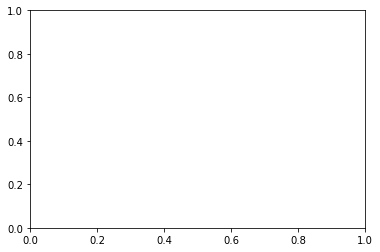

In [118]:
figs,axs = plt.subplots()
## active sampling
l_active = np.zeros(BUDGET)
print("Begin DH active sampling.")
for i in np.arange(N_TRAILS):
    print("Currently on trail %d"%(i))
    queries,error,hs,P = DH_sampling(X_train,y_train,Z,BUDGET,BATCH_SIZE,sampling_method="active")
    l_active+=error
l_active = l_active/N_TRAILS


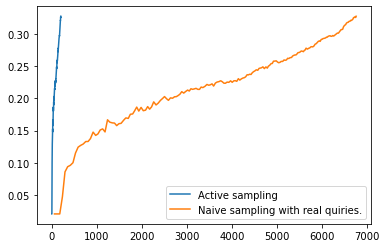

In [122]:
figs,axs = plt.subplots()
axs.plot(1 - np.array(l_active),label = "Active sampling")
axs.plot(queries, 1 - np.array(error), label = "Naive sampling with real quiries.")
plt.legend()